# Classification Project: What Causes Telco Churn?

## --- Pipeline phase 1: Planning: ---

 ### In this notebook we will explore where drivers for churn or attrition might be based on a dataset snapshot of customers for a telecommunications service.  We will investigate differences between groups of customers and what might make one group or class different from another, and if that has any bearing on their propensity to leave the company.

In [30]:
# setting up our environment: 

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

from acquire import get_telco_data
from telco_prep import *
from matplotlib import cm
from matplotlib.ticker import FormatStrFormatter


from scipy.stats import ttest_ind as ttest
from scipy.stats import pearsonr

In [31]:
df = get_telco_data()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
internet_service_type_id    7043 non-null int64
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
contract_type_id            7043 non-null int64
paperless_billing           7043 non-null object
payment_type_id             7043 non-null int64
monthly_charges 

In [33]:
df = prep_telco_data(df)

/Users/mcapper/Documents/Codeup/classification_project/classification_orion_matthew/telco_prep.py:96: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df['total_charges'] = df['total_charges'].convert_objects(convert_numeric=True)


In [4]:
df[['payment_type', 'payment_type_id']].head()

,payment_type,payment_type_id
0,Mailed check,2
1,Credit card (automatic),4
2,Electronic check,1
3,Electronic check,1
4,Bank transfer (automatic),3


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
internet_service_type_id    7043 non-null int64
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
contract_type_id            7043 non-null int64
paperless_billing           7043 non-null object
payment_type_id             7043 non-null int64
monthly_charges 

In [5]:
df[['int_type_id']]

,int_type_id
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [6]:
df = drop_cols(df)

In [7]:
# 11: Numeric Scaling: scale the monthly_charges and total_charges data. 
# Make sure that the parameters for scaling are learned from the training data set.

# ~~~~~SPLIT~~~~~
# ~~This is also #9 ~~
X = df.drop(['churn'], axis = 1)
y = df[['churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.70, random_state=123)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

scaler = MinMaxScaler()
scaler.fit(train[['monthly_charges', 'total_charges']])

train[['monthly_charges', 'total_charges']] = scaler.transform(train[['monthly_charges', 'total_charges']])
test[['monthly_charges', 'total_charges']] = scaler.transform(test[['monthly_charges', 'total_charges']])


/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
train.head()

,senior_citizen,tenure,contract_type_id,payment_type_id,monthly_charges,total_charges,tenure_year,phone_id,household_type_id,streaming_services,online_security_backup,gender_e,device_protection_e,tech_support_e,paperless_billing_e,int_type_id,churn
1479,0,52,2,1,0.502488,0.399729,5,1,3,1,2,1,2,2,1,1,0
2377,0,59,3,4,0.716915,0.597190,5,2,3,3,3,0,2,2,0,1,0
6613,0,46,3,3,0.019900,0.100571,4,1,3,0,0,0,1,1,0,0,0
6468,0,55,3,3,0.074129,0.164418,5,2,1,0,0,1,1,1,0,0,0
2668,0,10,1,1,0.613930,0.096746,1,1,1,1,0,1,0,0,1,2,1


In [9]:
cols = []
for col in train:
    cols.append(col)
cols


# cmap = cm.get_cmap('gnuplot')
# scatter = pd.scatter_matrix(
#     train[cols], marker='o', s=40,
#     hist_kwds={'bins':15},  figsize=(14,8), cmap=cmap)

['senior_citizen',
 'tenure',
 'contract_type_id',
 'payment_type_id',
 'monthly_charges',
 'total_charges',
 'tenure_year',
 'phone_id',
 'household_type_id',
 'streaming_services',
 'online_security_backup',
 'gender_e',
 'device_protection_e',
 'tech_support_e',
 'paperless_billing_e',
 'int_type_id',
 'churn']

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


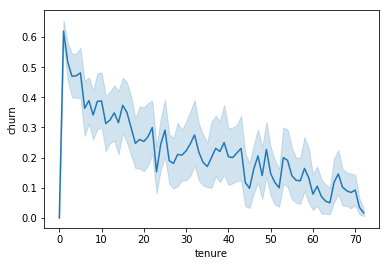

In [10]:
# #1
sns.lineplot(x='tenure', y='churn', data=df)

In [11]:
higher_monthly_charges = train[['churn']][train.monthly_charges > train.monthly_charges.quantile(0.70)]
lower_monthly_charges = train[['churn']][train.monthly_charges < train.monthly_charges.quantile(0.70)]
ttest(higher_monthly_charges, lower_monthly_charges)

Ttest_indResult(statistic=array([6.46716504]), pvalue=array([1.09527993e-10]))

In [12]:
higher_monthly_charges = train[['monthly_charges', 'churn']][train.monthly_charges > train.monthly_charges.quantile(0.70)]
lower_monthly_charges = train[['monthly_charges', 'churn']][train.monthly_charges < train.monthly_charges.quantile(0.70)]

### # 4: is the churn rate significantly different for those on a month-to-month plan after month 12 than those on 1 year contracts after 12th month?


In [13]:
year_old_monthlies = train[train.tenure >= 12][train.contract_type_id == 1]
year_old_monthlies.head()
year_old_contract = train[train.tenure >= 12][train.contract_type_id == 2]
ttest(year_old_monthlies.churn, year_old_contract.churn)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Ttest_indResult(statistic=11.62871844836295, pvalue=2.016256590347219e-30)

In [14]:
# 5: are the mean monthly charges for those who have churned significantly different than for
# those who have not churned?
has_churned = train[train.churn == 1]
not_churned = train[train.churn == 0]
for col in train:
    ttest(has_churned.monthly_charges, not_churned.monthly_charges)
ttest(has_churned.monthly_charges, not_churned.monthly_charges)
ttest(has_churned[['int_type_id', 'monthly_charges']].monthly_charges, not_churned[['int_type_id', 'monthly_charges']].monthly_charges)

Ttest_indResult(statistic=13.331665723423388, pvalue=7.373902028300163e-40)

In [15]:
# How much of monthly_charges can be explained by internet_service_type? 
# (hint: correlation test). State your hypotheses and your conclusion clearly.
cor_test = train[['monthly_charges', 'internet_service_type_id']]
cor_test.groupby('internet_service_type_id').mean()
# sns.heatmap(cor_test.corr(), annot=True)
# pearsonr(cor_test.internet_service_type_id, cor_test.monthly_charges)
# pearsonr()

KeyError: "['internet_service_type_id'] not in index"

### #6: How much of monthly_charges can be explained by internet_service_type? (hint: correlation test). State your hypotheses and your conclusion clearly.

In [16]:
train['int_type_id'] = train['internet_service_type_id'].replace({3: 0, 2: 2, 1: 1})

KeyError: 'internet_service_type_id'

In [17]:
train[['int_type_id', 'internet_service_type_id']].head()

KeyError: "['internet_service_type_id'] not in index"

In [18]:
pd.crosstab(train.int_type_id, train.churn, margins=True).style.background_gradient(cmap='YlOrRd')

churn,0,1,All
int_type_id,,,
0,978,84,1062
1,1376,317,1693
2,1277,898,2175
All,3631,1299,4930


In [19]:
pearsonr(train.int_type_id, train.monthly_charges)


(0.9059453029899808, 0.0)

In [20]:
no_int = train[train.int_type_id == 0]
dsl_int = train[train.int_type_id == 1]
fbr_int = train[train.int_type_id == 2]

In [21]:
for i in (no_int, dsl_int, fbr_int):
    print(ttest(i.monthly_charges, i.churn))
    print(pearsonr(i.monthly_charges, i.churn))

Ttest_indResult(statistic=-6.120712912522637, pvalue=1.1065031150416752e-09)
(-0.10086204524930596, 0.0009967140153946748)
Ttest_indResult(statistic=20.34269354091509, pvalue=6.9262822961096465e-87)
(-0.25735349620897335, 5.143468440547046e-27)
Ttest_indResult(statistic=28.849608415494284, pvalue=1.2977112085035131e-167)
(-0.23017545767238606, 1.5193247315385181e-27)


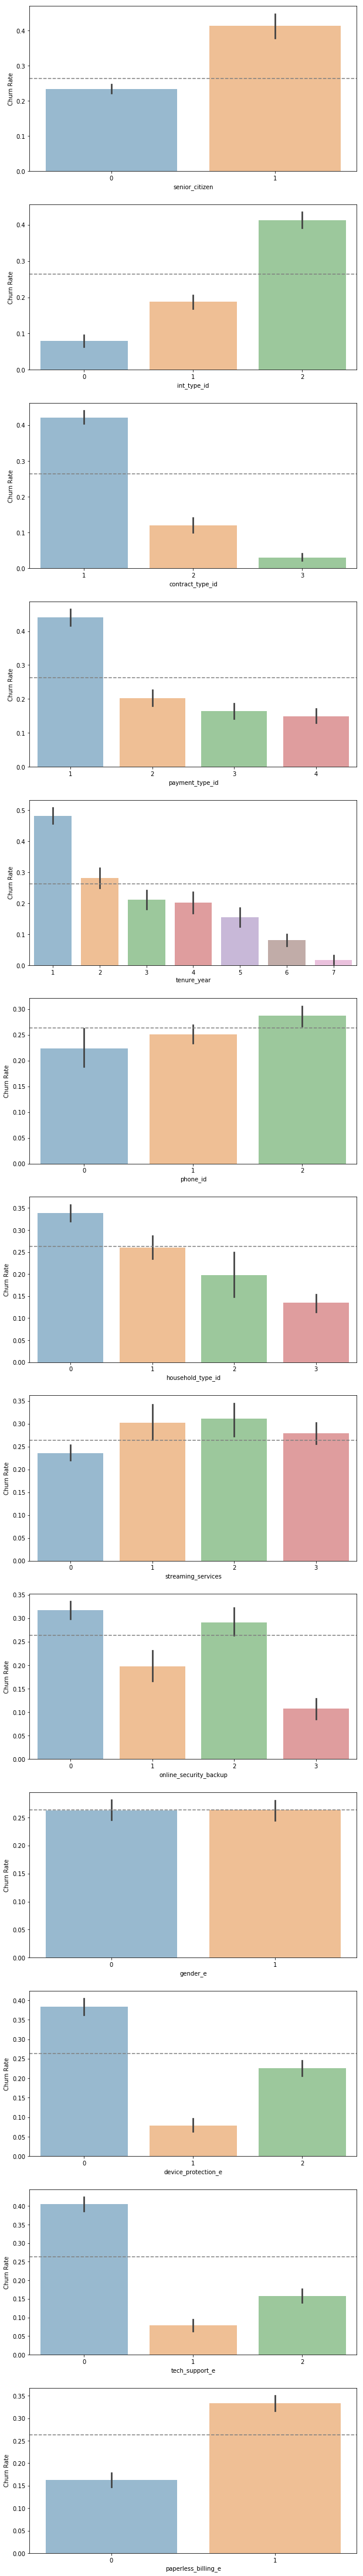

In [22]:
features = ['senior_citizen','int_type_id','contract_type_id','payment_type_id', 'tenure_year', 'phone_id', 'household_type_id', 'streaming_services', 'online_security_backup','gender_e', 'device_protection_e', 'tech_support_e', 'paperless_billing_e']

_, ax = plt.subplots(nrows=13, ncols=1, figsize=(10,80))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

In [23]:
features = ['senior_citizen','int_type_id','contract_type_id','payment_type_id', 'tenure_year', 'phone_id', 'household_type_id', 'streaming_services', 'online_security_backup','gender_e', 'device_protection_e', 'tech_support_e', 'paperless_billing_e']

for feature in features:
    print(ttest(has_churned[[feature, 'monthly_charges']].monthly_charges, not_churned[[feature, 'monthly_charges']].monthly_charges))
    

Ttest_indResult(statistic=13.331665723423388, pvalue=7.373902028300163e-40)
Ttest_indResult(statistic=13.331665723423388, pvalue=7.373902028300163e-40)
Ttest_indResult(statistic=13.331665723423388, pvalue=7.373902028300163e-40)
Ttest_indResult(statistic=13.331665723423388, pvalue=7.373902028300163e-40)
Ttest_indResult(statistic=13.331665723423388, pvalue=7.373902028300163e-40)
Ttest_indResult(statistic=13.331665723423388, pvalue=7.373902028300163e-40)
Ttest_indResult(statistic=13.331665723423388, pvalue=7.373902028300163e-40)
Ttest_indResult(statistic=13.331665723423388, pvalue=7.373902028300163e-40)
Ttest_indResult(statistic=13.331665723423388, pvalue=7.373902028300163e-40)
Ttest_indResult(statistic=13.331665723423388, pvalue=7.373902028300163e-40)
Ttest_indResult(statistic=13.331665723423388, pvalue=7.373902028300163e-40)
Ttest_indResult(statistic=13.331665723423388, pvalue=7.373902028300163e-40)
Ttest_indResult(statistic=13.331665723423388, pvalue=7.373902028300163e-40)


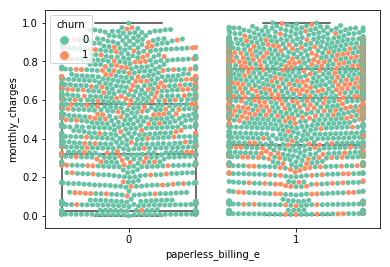

In [24]:
sns.swarmplot(x="paperless_billing_e", y="monthly_charges", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="paperless_billing_e", y="monthly_charges", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})



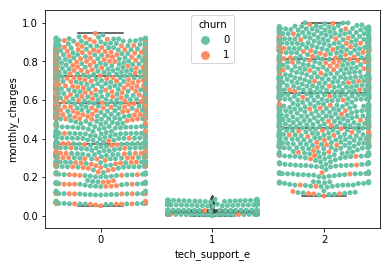

In [25]:
sns.swarmplot(x="tech_support_e", y="monthly_charges", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="tech_support_e", y="monthly_charges", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

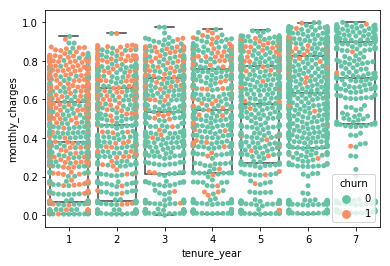

In [26]:
sns.swarmplot(x="tenure_year", y="monthly_charges", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="tenure_year", y="monthly_charges", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

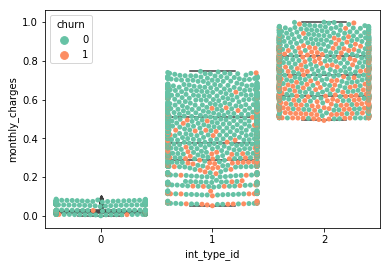

In [27]:
sns.swarmplot(x="int_type_id", y="monthly_charges", data=train, hue="churn", palette="Set2")
ax = sns.boxplot(x="int_type_id", y="monthly_charges", data=train,
        showcaps=True,boxprops={'facecolor':'None'},
        showfliers=True,whiskerprops={'linewidth':0})

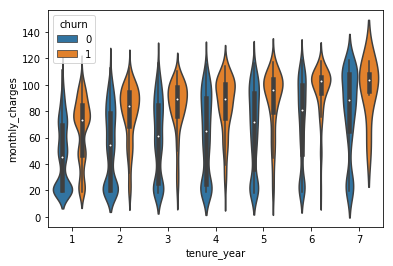

In [28]:
# figure = figsize(18,5)
sns.violinplot(x='tenure_year', y='monthly_charges', hue='churn', data=df)

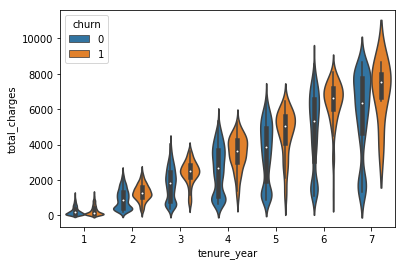

In [29]:
sns.violinplot(x='tenure_year', y='total_charges', hue='churn', data=df)